# Hierachical Clustering
### Aglomerative Approacess
* Bottom-Up / Additive Hierachical Clustering 
### Divisive Approacess
* Top-Down Hierachical Clustering 
* DIANA (Divisive Analysis)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Pre-Process

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [5]:
x = df[['Annual_Income_(k$)', 'Spending_Score']] # df.ilock[:, 3:]

In [7]:
x.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


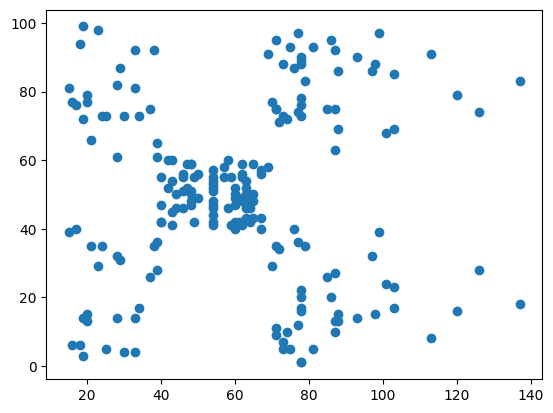

In [9]:
plt.scatter(x= df['Annual_Income_(k$)'], y= df['Spending_Score'])
plt.show()

### Create Dandrogram

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = (15,10)

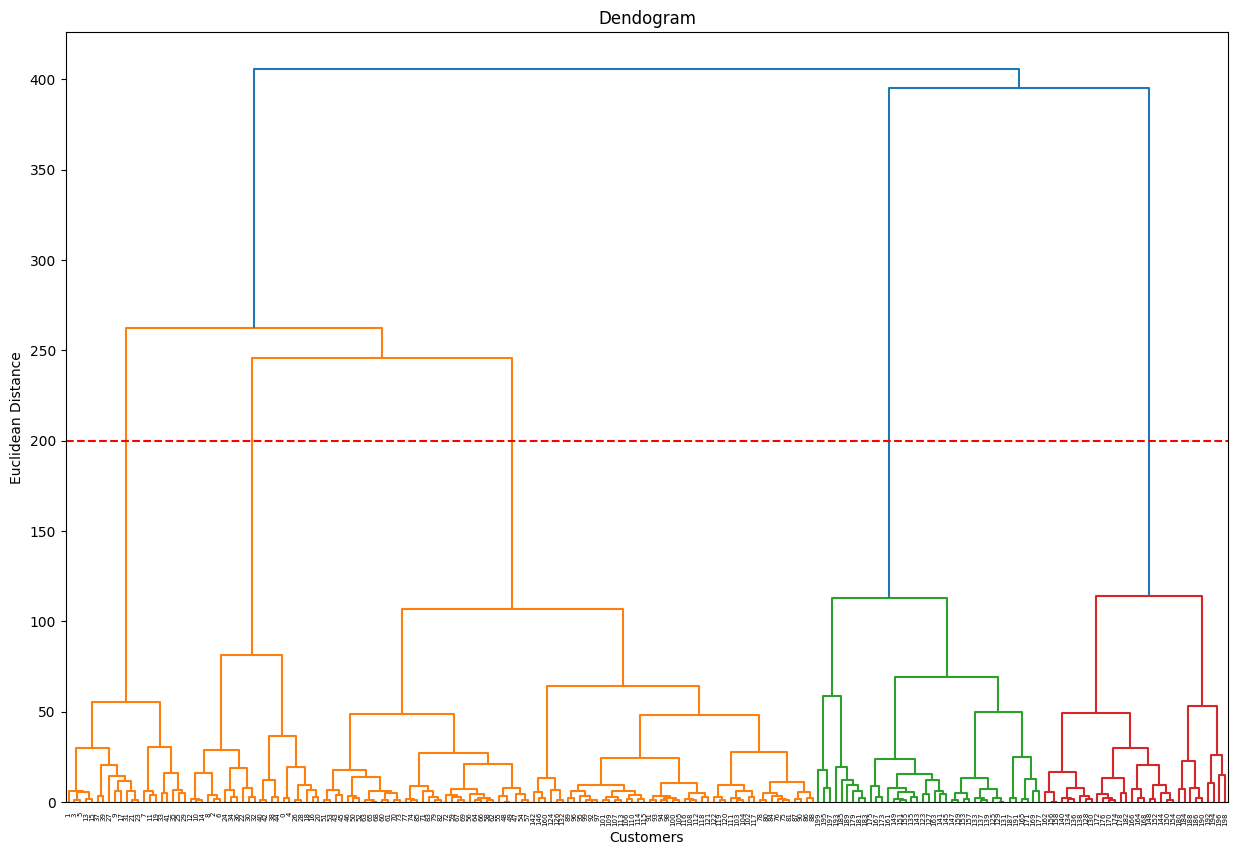

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward')) # Ward linkage method 
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(y = 200, color='red', linestyle='dashed')
plt.show()

conclusion of graph ==> dicrease distance they have more cluster 

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward', metric = 'euclidean') # affinity == metric
y_pred = hc.fit_predict(x)

In [20]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

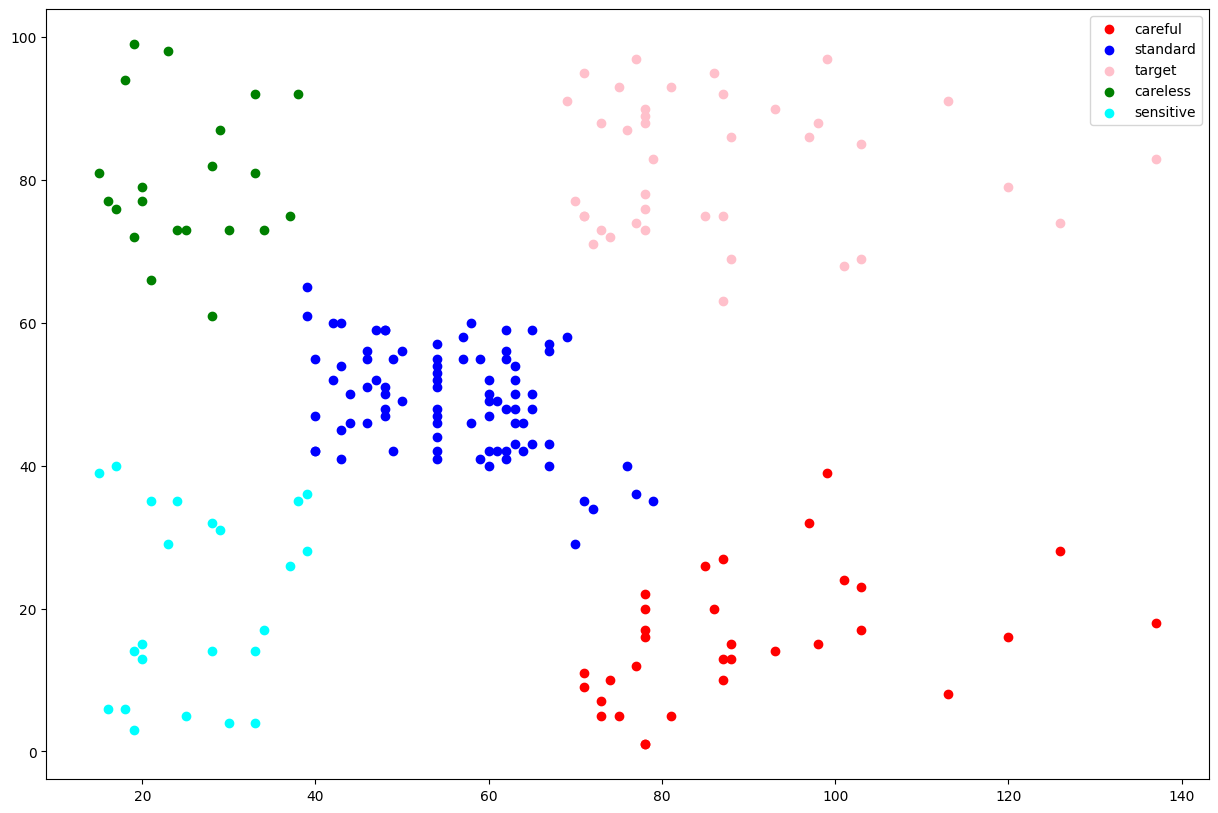

In [29]:
plt.scatter(x.iloc[y_pred == 0,0], x.iloc[y_pred == 0,1], c='red', label = 'careful')
plt.scatter(x.iloc[y_pred == 1,0], x.iloc[y_pred == 1,1], c='blue', label = 'standard')
plt.scatter(x.iloc[y_pred == 2,0], x.iloc[y_pred == 2,1], c='pink', label = 'target')
plt.scatter(x.iloc[y_pred == 3,0], x.iloc[y_pred == 3,1], c='green', label = 'careless')
plt.scatter(x.iloc[y_pred == 4,0], x.iloc[y_pred == 4,1], c='cyan', label = 'sensitive')
plt.legend()
plt.show()

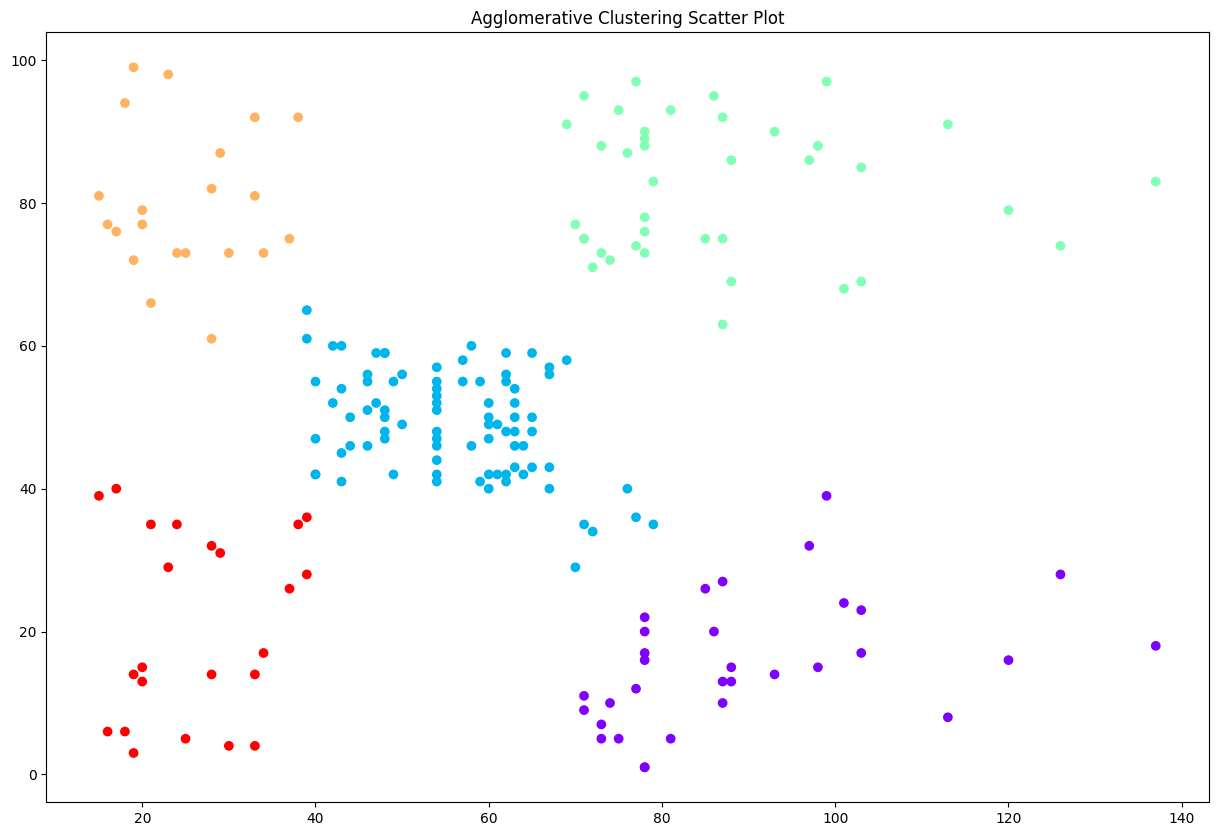

In [31]:
# for my own Code
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_pred, cmap='rainbow')
plt.title("Agglomerative Clustering Scatter Plot")
plt.show()

#

# > Silhouette Score

In [33]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(x, y_pred)  # use y_pred to label = hc.labels_ ; hc is model name
ss

np.float64(0.5529945955148897)